# COMP550 Final Project: 
## The Effectiveness of English Extractive Text Summarization Methods Across Languages

Nakiya Noorbhai, Kira Noël, and Luca Garnier-Landurie

## Datasets

We use the datasets cnn_dailymail (https://huggingface.co/datasets/cnn_dailymail) and mlsum (https://huggingface.co/datasets/mlsum) from huggingface. We will use the training split as our dev set and the validation and test sets as our test set.

In [3]:
from datasets import load_dataset, concatenate_datasets

# English
en_dev = load_dataset('cnn_dailymail', '3.0.0', split='train')
en_test = concatenate_datasets([load_dataset('cnn_dailymail', '3.0.0', split='validation'), load_dataset('cnn_dailymail', '3.0.0', split='test')])

# German
de_dev = load_dataset('mlsum', 'de', split='train')
de_test = concatenate_datasets([load_dataset('mlsum', 'de', split='validation'), load_dataset('mlsum', 'de', split='test')])

# Spanish
es_dev = load_dataset('mlsum', 'es', split='train')
es_test = concatenate_datasets([load_dataset('mlsum', 'es', split='validation'), load_dataset('mlsum', 'es', split='test')])

# French
fr_dev = load_dataset('mlsum', 'fr', split='train')
fr_test = concatenate_datasets([load_dataset('mlsum', 'fr', split='validation'), load_dataset('mlsum', 'fr', split='test')])

# Russian
ru_dev = load_dataset('mlsum', 'ru', split='train')
ru_test = concatenate_datasets([load_dataset('mlsum', 'ru', split='validation'), load_dataset('mlsum', 'ru', split='test')])

# Turkish
tu_dev = load_dataset('mlsum', 'tu', split='train')
tu_test = concatenate_datasets([load_dataset('mlsum', 'tu', split='validation'), load_dataset('mlsum', 'tu', split='test')])

Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/es/1.0.0/7

In [14]:
dev_sets = (en_dev, de_dev, es_dev, fr_dev, ru_dev, tu_dev)
test_sets = (en_test, de_test, es_test, fr_test, ru_test, tu_test)
languages = ('english', 'german', 'spanish', 'french', 'russian', 'turkish')

## Data Exploration

In [17]:
def print_stats(language, dev, test):
    '''
    Get the average summary and article lengths, and the average ratio.
    Also collect dataset sizes.
    '''
    SAMPLES = 5000

    summary_wcs_dev = []
    article_wcs_dev = []
    summary_scs_dev = []
    article_scs_dev = []
    summary_article_wc_ratios_dev = []
    count = 0
    for e in dev:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_dev.append(len(e['text'].split()))
            summary_wcs_dev.append(len(e['summary'].split()))
            article_scs_dev.append(len(e['text'].split('.')))
            summary_scs_dev.append(len(e['summary'].split('.')))
        except:
            article_wcs_dev.append(len(e['article'].split()))
            summary_wcs_dev.append(len(e['highlights'].split()))
            article_scs_dev.append(len(e['article'].split('.')))
            summary_scs_dev.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_dev.append(article_wcs_dev[-1] / summary_wcs_dev[-1])
    len_dev = len(summary_wcs_dev)
    avg_summary_wc_dev = sum(summary_wcs_dev) / len_dev
    avg_article_wc_dev = sum(article_wcs_dev) / len_dev
    avg_summary_sc_dev = sum(summary_scs_dev) / len_dev
    avg_article_sc_dev = sum(article_scs_dev) / len_dev
    avg_ratio_dev = sum(summary_article_wc_ratios_dev) / len_dev
    
    summary_wcs_test = []
    article_wcs_test = []
    summary_scs_test = []
    article_scs_test = []
    summary_article_wc_ratios_test = []
    count = 0
    for e in test:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_test.append(len(e['text'].split()))
            summary_wcs_test.append(len(e['summary'].split()))
            article_scs_test.append(len(e['text'].split('.')))
            summary_scs_test.append(len(e['summary'].split('.')))
        except:
            article_wcs_test.append(len(e['article'].split()))
            summary_wcs_test.append(len(e['highlights'].split()))
            article_scs_test.append(len(e['article'].split('.')))
            summary_scs_test.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_test.append(article_wcs_test[-1] / summary_wcs_test[-1])
    len_test = len(summary_wcs_test)
    avg_summary_wc_test = sum(summary_wcs_test) / len_test
    avg_article_wc_test = sum(article_wcs_test) / len_test
    avg_summary_sc_test = sum(summary_scs_test) / len_test
    avg_article_sc_test = sum(article_scs_test) / len_test
    avg_ratio_test = sum(summary_article_wc_ratios_test) / len_test

    print('--- ' + language + ' ---')
    print('Dev set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev))
    print('Test set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test))
    print()
    return (language, len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev, 
            len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test)

stats = []
for l, dev, test in zip(languages, dev_sets, test_sets):
    stats.append(print_stats(l, dev, test))

--- english ---
Dev set - num entries: 5000, avg summary wc: 45.60, avg article wc: 656.44, avg ratio: 14.65, avg summary sc: 4.85, avg article sc: 38.78
Test set - num entries: 5000, avg summary wc: 54.18, avg article wc: 670.72, avg ratio: 13.90, avg summary sc: 4.85, avg article sc: 35.96

--- german ---
Dev set - num entries: 5000, avg summary wc: 25.87, avg article wc: 516.23, avg ratio: 21.56, avg summary sc: 2.86, avg article sc: 32.29
Test set - num entries: 5000, avg summary wc: 23.11, avg article wc: 549.22, avg ratio: 25.17, avg summary sc: 2.86, avg article sc: 34.01

--- spanish ---
Dev set - num entries: 5000, avg summary wc: 17.33, avg article wc: 683.11, avg ratio: 41.98, avg summary sc: 1.13, avg article sc: 32.94
Test set - num entries: 5000, avg summary wc: 21.55, avg article wc: 741.88, avg ratio: 36.14, avg summary sc: 1.20, avg article sc: 34.23

--- french ---
Dev set - num entries: 5000, avg summary wc: 24.01, avg article wc: 494.56, avg ratio: 24.28, avg summar

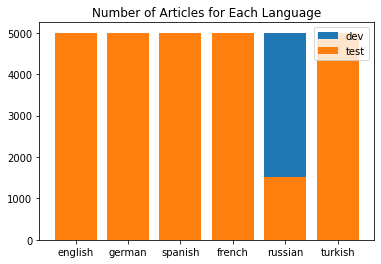

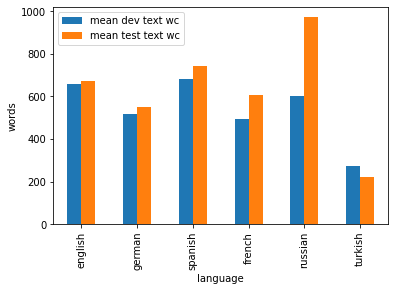

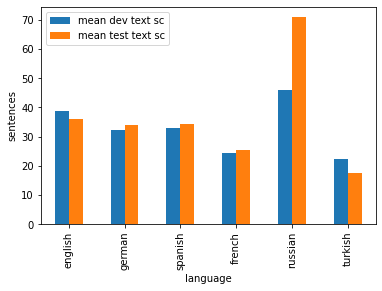

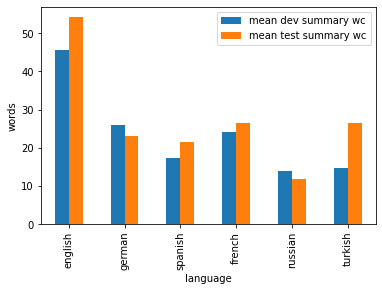

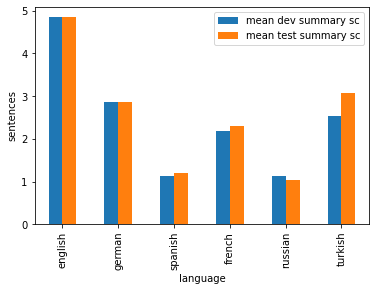

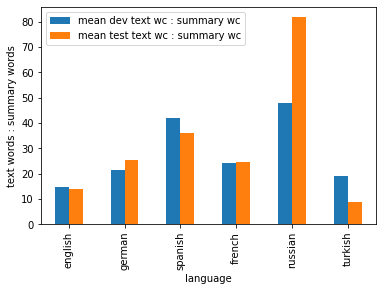

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['language', 'number of dev articles', 'mean dev summary wc', 'mean dev text wc', 'mean dev text wc : summary wc', 'mean dev summary sc', 'mean dev text sc',
           'number of test articles', 'mean test summary wc', 'mean test text wc', 'mean test text wc : summary wc', 'mean test summary sc', 'mean test text sc']
df = pd.DataFrame(stats, columns=columns)

# Plot the relative sizes
len_dev = df['number of dev articles'].tolist()
len_test = df['number of test articles'].tolist()
plt.figure()
plt.title('Number of Articles for Each Language')
plt.bar(languages, len_dev, label='dev')
plt.bar(languages, len_test, label='test')
plt.legend(loc='upper right')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc', 'mean test text wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev text sc', 'mean test text sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev summary wc', 'mean test summary wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev summary sc', 'mean test summary sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc : summary wc', 'mean test text wc : summary wc'], kind='bar')
ax.set_ylabel('text words : summary words')
plt.show()

## Method

### Metrics

In [16]:
from rouge import Rouge
rouge = Rouge()

### Models

In [17]:
import numpy as np
from nltk.corpus import stopwords
from summarizers.luhn import luhn_summarize
from summarizers.textrank import textrank_summarize, w2v_textrank_summarize
from summarizers.lsa import lsa_summarize

In [19]:
def run_experiment(summarizer, dataset, language, name, save=None, max_samples=5000, stopwords=None, arg=None):
    """
    input:
        summarizer: model to summarize the text
        preprocess: preprocessing 
        dataset: data to summarize
        language: language name of dataset
        name: experiment name (ex. 'luhn_no_stopwords')
        save: if None, do not save. Otherwise, treat as dictionary and save results to save[name]
        max_samples: number of samples to summarize
        stopwords: stopwords to use with the summarizer
        arg: extra argument for summarizer
    """
    scores = []
    count = 0
    text = 'article' if language == 'english' else 'text'
    summary = 'highlights' if language == 'english' else 'summary'
    for e in dataset:
        hypothesis = summarizer(e[text], e[summary], stopwords, arg)
        reference = e[summary]
        if len(hypothesis) > 0:
            try:
                scores.append(rouge.get_scores(hypothesis, reference))
                count += 1
            except:
                1
        if count >= max_samples:
            break

    # Compute overall statistics
    r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
    r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

    stats = {
        'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
        'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
    }
    print(f'{name}: {stats}')

    if save is not None:
        save[name] = stats

In [37]:
### Randomly select sentences from the original text. Create a baseline. ###
import random 
from nltk.tokenize import sent_tokenize

random.seed(42)

def random_summarize(document, reference, arg1, arg2):
    sum_sentences = len(sent_tokenize(reference))
    sentences = sent_tokenize(document)
    if sum_sentences > len(sentences):
        return ''
    summary = ' '.join(random.sample(sentences, sum_sentences))
    return summary

random: {'r1-f1': {'mean': 0.21987241452023937, 'std': 0.07435487692833427}, 'r2-f1': {'mean': 0.056600740805602144, 'std': 0.05792302965785027}}


## Experiment

In [39]:
english_rouge_scores = {}
french_rouge_scores = {}
german_rouge_scores = {}
russian_rouge_scores = {}
spanish_rouge_scores = {}
turkish_rouge_scores = {}

### English

#### LSA Summarizer

In [41]:
run_experiment(
    lsa_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'lsa', 
    stopwords=stopwords.words('english'),
    arg=5,
    max_samples=5,
)

lsa: {'r1-f1': {'mean': 0.1658835592192586, 'std': 0.022144892031914575}, 'r2-f1': {'mean': 0.012995764253588254, 'std': 0.01614933989703181}}


In [8]:
run_experiment(
        lsa_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        '', 
    )

: {'r1-f1': {'mean': 0.19479319124206873, 'std': 0.08410697417908901}, 'r2-f1': {'mean': 0.047045521210526076, 'std': 0.06083012486370185}}


#### Luhn Summarizer

##### With Stopwords

In [40]:


for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('english'), 
        arg=0.01*th,
        save=english_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565587148721477}, 'r2-f1

In [41]:
print(english_rouge_scores)

{'luhn_sw_th_1%': {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}, 'luhn_sw_th_2%': {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}, 'luhn_sw_th_4%': {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}, 'luhn_sw_th_8%': {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}, 'luhn_sw_th_16%': {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}, 'luhn_sw_th_32%': {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}, 'luhn_sw_th_64%': {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565

In [42]:
#run_experiment(
#    luhn_summarize, 
#    dev_sets[languages.index('english')], 
#    'english', 
#    'luhn_sw_th32', 
#    stopwords=stopwords.words('english'), 
#    arg=0.32, 
#    save=english_rouge_scores,
#)

##### Without Stopwords

In [43]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=english_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.21746235165458466, 'std': 0.08978644747242888}, 'r2-f1': {'mean': 0.058863712543075715, 'std': 0.06607548722885678}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.21840444031146017, 'std': 0.08879718090895289}, 'r2-f1': {'mean': 0.05970509556536031, 'std': 0.06560132454792302}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2217944916285753, 'std': 0.08852350557863924}, 'r2-f1': {'mean': 0.06103890944638688, 'std': 0.06533468768638709}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22825999006648504, 'std': 0.08918378293162026}, 'r2-f1': {'mean': 0.0643523785696358, 'std': 0.06654194951721842}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.23274943920351993, 'std': 0.09120634299678815}, 'r2-f1': {'mean': 0.06649202016777855, 'std': 0.06775543435983461}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.23403724219050792, 'std': 0.09128105129393249}, 'r2-f1': {'mean': 0.0678790535909055, 'std': 0.06815265279862215}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.23336456811094394, 'std': 0.092941440

In [44]:
print(english_rouge_scores)

{'luhn_sw_th_1%': {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}, 'luhn_sw_th_2%': {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}, 'luhn_sw_th_4%': {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}, 'luhn_sw_th_8%': {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}, 'luhn_sw_th_16%': {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}, 'luhn_sw_th_32%': {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}, 'luhn_sw_th_64%': {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565

In [45]:
#run_experiment(
#    luhn_summarize, 
#    dev_sets[languages.index('english')], 
#    'english', 
#    'luhn_nosw_th32',
#     arg=0.32, 
#    save=english_rouge_scores,
#)

#### TextRank Summarizer (Unigram Overlap)

**With Stopwords**

In [46]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # lower 
    save=english_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.24063952978773945, 'std': 0.08983469716578857}, 'r2-f1': {'mean': 0.07153641943589346, 'std': 0.06815386464408062}}


In [47]:
print(english_rouge_scores)

{'luhn_sw_th_1%': {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}, 'luhn_sw_th_2%': {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}, 'luhn_sw_th_4%': {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}, 'luhn_sw_th_8%': {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}, 'luhn_sw_th_16%': {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}, 'luhn_sw_th_32%': {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}, 'luhn_sw_th_64%': {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565

**Without Stopwords**

In [48]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=english_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.21858672860343004, 'std': 0.08736895376071378}, 'r2-f1': {'mean': 0.05851489656307806, 'std': 0.06434556061291041}}


#### TextRank Summarizer (Cosine Similarity)

**With Stopwords**

In [49]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('english'), 
    arg=True,
    save=english_rouge_scores,
)

/Users/Luca/opt/anaconda3/lib/python3.8/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:335: RuntimeWarning: divide by zero encountered in true_divide
  return dict(zip(G, map(float, largest / norm)))
/Users/Luca/opt/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


textrank_sw_cos: {'r1-f1': {'mean': 0.19660366616086689, 'std': 0.09283313287021201}, 'r2-f1': {'mean': 0.04589284681659213, 'std': 0.06468773489106722}}


**Without Stopwords**

In [50]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_cos', 
    arg=True,
    save=english_rouge_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.20016225420289355, 'std': 0.09578402499192173}, 'r2-f1': {'mean': 0.04861572636894324, 'std': 0.0689954791653926}}


##### LSA Summarizer

In [51]:
print(english_rouge_scores)

{'luhn_sw_th_1%': {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}, 'luhn_sw_th_2%': {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}, 'luhn_sw_th_4%': {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}, 'luhn_sw_th_8%': {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}, 'luhn_sw_th_16%': {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}, 'luhn_sw_th_32%': {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}, 'luhn_sw_th_64%': {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565

### French

#### LSA Summarizer

In [95]:
run_experiment(
        lsa_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        '', 
        stopwords=stopwords.words('french'), 
    )

/home/ke-noel/.local/lib/python3.8/site-packages/gensim/models/tfidfmodel.py:211: RuntimeWarning: divide by zero encountered in log2
  return max(0, np.log2((1.0 * totaldocs - docfreq) / docfreq))
/home/ke-noel/.local/lib/python3.8/site-packages/gensim/models/lsimodel.py:101: RuntimeWarning: invalid value encountered in true_divide
  rel_spectrum = np.abs(1.0 - np.cumsum(s / np.sum(s)))


: {'r1-f1': {'mean': 0.15100240722568378, 'std': 0.13685382137002972}, 'r2-f1': {'mean': 0.044414936363756395, 'std': 0.12989453883628221}}


#### Luhn Summarizer

In [140]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        name, 
        stopwords=stopwords.words('french'), 
        arg=0.01*th,
    )

top 1% of words considered meaningful
{'r1-f1': {'mean': 0.19951957561206057, 'std': 0.20527866869893593}, 'r2-f1': {'mean': 0.09112643879169724, 'std': 0.21392668576846907}}
top 2% of words considered meaningful
{'r1-f1': {'mean': 0.19295323477277543, 'std': 0.18441409902765254}, 'r2-f1': {'mean': 0.07894322487583284, 'std': 0.18783263854848495}}
top 4% of words considered meaningful
{'r1-f1': {'mean': 0.1954057367813279, 'std': 0.18437779125198514}, 'r2-f1': {'mean': 0.08086297251076377, 'std': 0.1886752420136729}}
top 8% of words considered meaningful
{'r1-f1': {'mean': 0.21273423045500164, 'std': 0.20314843451335043}, 'r2-f1': {'mean': 0.09719729017233149, 'std': 0.21078867900246634}}
top 16% of words considered meaningful
{'r1-f1': {'mean': 0.2334143573554614, 'std': 0.227928719469927}, 'r2-f1': {'mean': 0.12104620183136805, 'std': 0.23854865318116317}}
top 32% of words considered meaningful
{'r1-f1': {'mean': 0.25307323224491, 'std': 0.24757801746507618}, 'r2-f1': {'mean': 0.1426

In [59]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'luhn_sw_th32', 
    stopwords=stopwords.words('french'), 
    arg=0.32, 
    save=french_rouge_scores,
)

luhn_sw_th32: {'r1-f1': {'mean': 0.2861135244139117, 'std': 0.2730628514356374}, 'r2-f1': {'mean': 0.1797158678724145, 'std': 0.2892953319009413}}


In [58]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        name, 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.19951957561206057, 'std': 0.20527866869893593}, 'r2-f1': {'mean': 0.09112643879169724, 'std': 0.21392668576846907}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.19295323477277543, 'std': 0.18441409902765254}, 'r2-f1': {'mean': 0.07894322487583284, 'std': 0.18783263854848495}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.1954057367813279, 'std': 0.18437779125198514}, 'r2-f1': {'mean': 0.08086297251076377, 'std': 0.1886752420136729}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.21273423045500164, 'std': 0.20314843451335043}, 'r2-f1': {'mean': 0.09719729017233149, 'std': 0.21078867900246634}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.2334143573554614, 'std': 0.227928719469927}, 'r2-f1': {'mean': 0.12104620183136805, 'std': 0.23854865318116317}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.25307323224491, 'std': 0.24757801746507618}, 'r2-f1': {'mean': 

In [60]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'luhn_nosw_th32',  
    arg=0.32, 
    save=french_rouge_scores,
)

luhn_nosw_th32: {'r1-f1': {'mean': 0.25307323224491, 'std': 0.24757801746507618}, 'r2-f1': {'mean': 0.14265611600137879, 'std': 0.2600680258153077}}


### German

#### Luhn Summarization

In [95]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        name, 
        stopwords=stopwords.words('german'), 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.3757091768998665, 'std': 0.3247104952023329}, 'r2-f1': {'mean': 0.29407762469792514, 'std': 0.35347091121716545}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.34696037917200406, 'std': 0.3021847711509309}, 'r2-f1': {'mean': 0.2573670489605894, 'std': 0.3291237110639975}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.33869059648723326, 'std': 0.30119272080019077}, 'r2-f1': {'mean': 0.24812642872125998, 'std': 0.328803495269107}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.3778390902080913, 'std': 0.31195908857444277}, 'r2-f1': {'mean': 0.2870556354592791, 'std': 0.3437158702547447}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.3891449981274353, 'std': 0.3168761709826021}, 'r2-f1': {'mean': 0.3004421683714651, 'std': 0.35071943101695635}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.2887059479857251, 'std': 0.2701825068674965}, 'r2-f1': {'mean': 0.18969

In [99]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'luhn_sw_th8', 
    stopwords=stopwords.words('german'), 
    arg=0.08,
    save=german_rouge_scores,
)

luhn_sw_th8: {'r1-f1': {'mean': 0.3778390902080913, 'std': 0.31195908857444277}, 'r2-f1': {'mean': 0.2870556354592791, 'std': 0.3437158702547447}}


In [98]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        name,
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.18886553418820148, 'std': 0.20161498473870734}, 'r2-f1': {'mean': 0.08674823230944638, 'std': 0.21267136188127156}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.1888785839471814, 'std': 0.19718307338470684}, 'r2-f1': {'mean': 0.08157568338557929, 'std': 0.2087346200324126}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.19110000123535478, 'std': 0.19707963169230533}, 'r2-f1': {'mean': 0.08214944864843755, 'std': 0.20799281732711009}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.2061564187209874, 'std': 0.2164293067807543}, 'r2-f1': {'mean': 0.09946109765556875, 'std': 0.23278238213048705}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.24803292330807716, 'std': 0.2549033340349356}, 'r2-f1': {'mean': 0.14339031116968062, 'std': 0.27615067574588426}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.29231092118854995, 'std': 0.2902129346599643}, 'r2-f1': {'mean'

In [100]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'luhn_nosw_th32', 
    stopwords=stopwords.words('german'), 
    arg=0.32,
    save=german_rouge_scores,
)

luhn_nosw_th32: {'r1-f1': {'mean': 0.2887059479857251, 'std': 0.2701825068674965}, 'r2-f1': {'mean': 0.18969354415947107, 'std': 0.2951548372676884}}


### Russian

#### Luhn Summarizer

In [69]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        name, 
        stopwords=stopwords.words('russian'), 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.05544077080422127, 'std': 0.06569656497502273}, 'r2-f1': {'mean': 0.005234164236760314, 'std': 0.03668827526020228}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.061956565111868714, 'std': 0.0740294861968824}, 'r2-f1': {'mean': 0.007332349010525226, 'std': 0.049056576258552406}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.06490715905175577, 'std': 0.07886923721721938}, 'r2-f1': {'mean': 0.009204050745622062, 'std': 0.05439295289737507}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.06303410803077202, 'std': 0.08070570112689543}, 'r2-f1': {'mean': 0.009457014423519454, 'std': 0.05716948250363419}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.05991929272141094, 'std': 0.07558656913178544}, 'r2-f1': {'mean': 0.007907649404231745, 'std': 0.0507496491931993}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.06553888188340755, 'std': 0.0586438160284072}, 'r2-f1

In [72]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'luhn_sw_th32', 
    stopwords=stopwords.words('russian'), 
    arg=0.32,
    save=russian_rouge_scores,
)

luhn_sw_th32: {'r1-f1': {'mean': 0.06553888188340755, 'std': 0.0586438160284072}, 'r2-f1': {'mean': 0.005892747104484501, 'std': 0.02269892394753024}}


In [73]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        name,  
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.06447307157103334, 'std': 0.05764831555124273}, 'r2-f1': {'mean': 0.004067220480178852, 'std': 0.01825853914213049}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.06986148894189365, 'std': 0.0588140261208179}, 'r2-f1': {'mean': 0.005078133990053894, 'std': 0.020893240526849082}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.07000755094099519, 'std': 0.05847012805945968}, 'r2-f1': {'mean': 0.0049772654186310585, 'std': 0.018078509600093128}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.07084025346705768, 'std': 0.06564927746537214}, 'r2-f1': {'mean': 0.006557741192680938, 'std': 0.03726530340648067}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.06457285838163537, 'std': 0.07614561686710504}, 'r2-f1': {'mean': 0.007271415562444124, 'std': 0.052277954265339356}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.06754742499205327, 'std': 0.05884158840911266}, 'r

In [82]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'luhn_nosw_th32',  
    arg=0.08,
    save=russian_rouge_scores,
)

luhn_nosw_th32: {'r1-f1': {'mean': 0.07084025346705768, 'std': 0.06564927746537214}, 'r2-f1': {'mean': 0.006557741192680938, 'std': 0.03726530340648067}}


### Spanish

#### Luhn Summarizer

In [83]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        name, 
        stopwords=stopwords.words('spanish'), 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.16683487404218517, 'std': 0.09926962326788848}, 'r2-f1': {'mean': 0.03306550112462806, 'std': 0.05891264177699153}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.17115718394822, 'std': 0.09753261873649861}, 'r2-f1': {'mean': 0.034664843438851733, 'std': 0.0591469250353452}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.17376412014255502, 'std': 0.09660074094203104}, 'r2-f1': {'mean': 0.036926187705013006, 'std': 0.05999704654265988}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.17177693367768132, 'std': 0.09404380443753022}, 'r2-f1': {'mean': 0.034288705263964644, 'std': 0.054036410879327}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.16429459651053266, 'std': 0.09384241313467635}, 'r2-f1': {'mean': 0.03210074365968737, 'std': 0.05227466603564443}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.17113917574816193, 'std': 0.09345772655405413}, 'r2-f1': {'me

In [90]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'luhn_sw_th32', 
    stopwords=stopwords.words('spanish'), 
    arg=0.04,
    save=spanish_rouge_scores,
)

luhn_sw_th32: {'r1-f1': {'mean': 0.17376412014255502, 'std': 0.09660074094203104}, 'r2-f1': {'mean': 0.036926187705013006, 'std': 0.05999704654265988}}


In [91]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        name, 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.1534703189983634, 'std': 0.07673756596646177}, 'r2-f1': {'mean': 0.023848809490465913, 'std': 0.0416288626147772}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.15226576664349467, 'std': 0.07346457303484033}, 'r2-f1': {'mean': 0.0226164642781217, 'std': 0.0395972349794221}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.1554062561136058, 'std': 0.07573832678930299}, 'r2-f1': {'mean': 0.02332206595582764, 'std': 0.03975489812187662}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.1566862502128197, 'std': 0.0766407080974804}, 'r2-f1': {'mean': 0.02412379367446133, 'std': 0.04187117479187258}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.16182522659395474, 'std': 0.08096485354321052}, 'r2-f1': {'mean': 0.028113828812957792, 'std': 0.04703275574582947}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.16421603663359058, 'std': 0.08437279201890825}, 'r2-f1': {'mean

In [93]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'luhn_nosw_th32', 
    arg=0.32,
    save=spanish_rouge_scores,
)

luhn_nosw_th32: {'r1-f1': {'mean': 0.16421603663359058, 'std': 0.08437279201890825}, 'r2-f1': {'mean': 0.02966990224583684, 'std': 0.050025101856283984}}


### Turkish

#### Luhn Summarizer

In [63]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('turkish')], 
        'turkish', 
        name, 
        stopwords=stopwords.words('turkish'), 
        arg=0.01*th,
    )

top 1% of words considered meaningful: {'r1-f1': {'mean': 0.15898358126099255, 'std': 0.19283140140778357}, 'r2-f1': {'mean': 0.08237408907173618, 'std': 0.17061368817153857}}
top 2% of words considered meaningful: {'r1-f1': {'mean': 0.14645727201782985, 'std': 0.17861936646225637}, 'r2-f1': {'mean': 0.07361835741094962, 'std': 0.15576883584739534}}
top 4% of words considered meaningful: {'r1-f1': {'mean': 0.1480182442428639, 'std': 0.17332090284017096}, 'r2-f1': {'mean': 0.07225826625070085, 'std': 0.15051576982870493}}
top 8% of words considered meaningful: {'r1-f1': {'mean': 0.16242151425901982, 'std': 0.18689439246249462}, 'r2-f1': {'mean': 0.0839351174701768, 'std': 0.16446321024276875}}
top 16% of words considered meaningful: {'r1-f1': {'mean': 0.15984128232776532, 'std': 0.18209602881003967}, 'r2-f1': {'mean': 0.0811205031503974, 'std': 0.15795425887328696}}
top 32% of words considered meaningful: {'r1-f1': {'mean': 0.18052263583336967, 'std': 0.1924332289758102}, 'r2-f1': {'mea

In [67]:
run_experiment(
    luhn_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'luhn_sw_th32', 
    stopwords=stopwords.words('turkish'), 
    arg=0.32, 
    save=turkish_rouge_scores,
)

luhn_sw_th32: {'r1-f1': {'mean': 0.18052263583336967, 'std': 0.1924332289758102}, 'r2-f1': {'mean': 0.095885536955235, 'std': 0.17442324657765906}}


## Analysis (aka plots)

#